In [1]:
import copy
import json

import rclpy
from rclpy.node import Node

from nimbro_utils.imports_lazy import start_and_spin_node
from vlm_gist.imports_lazy import Detection, test_image_path

In [2]:
class DetectionNode(Node):
    def __init__(self, context=None):
        super().__init__("detection_node", context=context)
        self.detection = Detection(self, logger_severity=20)

In [3]:
node, executor, context, thread = start_and_spin_node(DetectionNode, blocking=False)

In [4]:
images = [test_image_path]
prompts = [["keyboard", "jacket", "mouse", "chair", "headphones", "hammer"]]

# images=["https://upload.wikimedia.org/wikipedia/commons/4/46/Table.JPG", "https://upload.wikimedia.org/wikipedia/commons/1/12/Universit%C3%A4t_Bonn.jpg"]
# prompts = [["keyboard", "jacket", "mouse", "chair", "headphones", "hammer"]]

success, message, labels, bboxes, confidences, masks, track_ids, metadata = node.detection.get(
    images=images,
    prompts=prompts,
    settings={'over_detect': 0.0, 'conf_threshold': 0.01, 'crop_masks': False}
)

2025-09-04 16:31:17.349 [INFO] [detection_node.detection]: Processing image '1' of '1' (/home/paetzoldb0/ws/jazzy/main/src/vlm_gist/data/detections/detection_edits/2025_09_04_16_31_16_865.png) with '6' prompts: ['keyboard', 'jacket', 'mouse', 'chair', 'headphones', 'hammer']
2025-09-04 16:31:19.971 [INFO] [detection_node.detection]: Detected '6' objects
2025-09-04 16:31:21.370 [INFO] [detection_node.detection]: Segmented '6' detections
2025-09-04 16:31:22.584 [INFO] [detection_node.detection]: Tracked '6' detections
2025-09-04 16:31:23.148 [INFO] [detection_node.detection]: Successfully processed '1' image.


/home/paetzoldb0/ws/jazzy/main/src/vlm_gist/datasets/vlm_gist/data/00009.jpg:


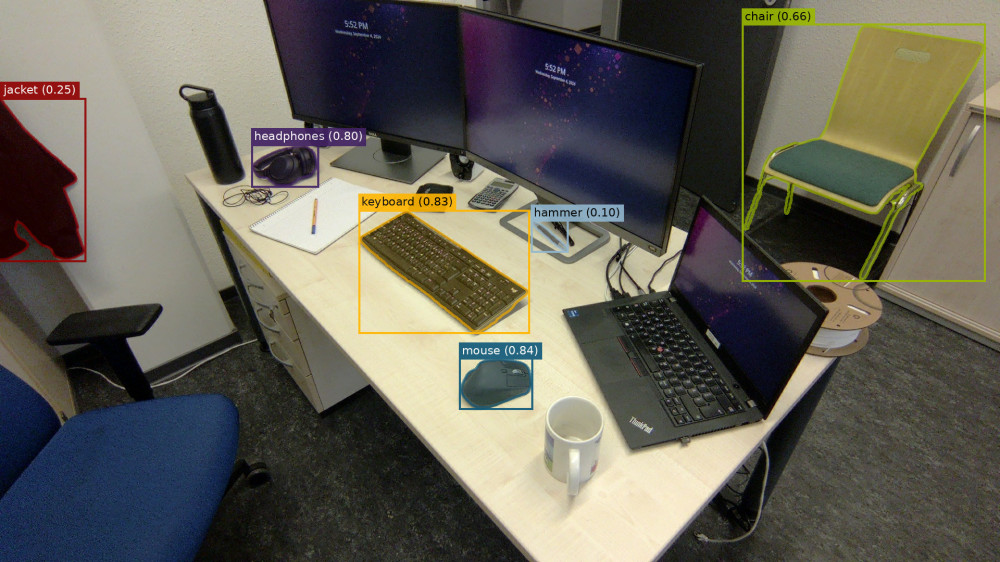

In [5]:
from nimbro_utils.imports_lazy import visualize_detections, show_image
visualizations = [visualize_detections(image=images[i], boxes=bboxes[i], masks=masks[i], labels=[f"{labels[i][j]} ({confidences[i][j]:.2f})" for j in range(len(labels[i]))], box_format="xyxy_absolute") for i in range(len(images))]
for i in range(len(images)):
    print(f"{images[i]}:")
    show_image(visualizations[i], width=1000)

In [6]:
executor.shutdown()
node.destroy_node()
context.shutdown()
del executor, node, context, thread